#### Project: Credit Card Fraud Detection Using Machine Learning and Deep Learning Techniques in E-commerce

#### Module-1: Build a Deep Neural Network

## Introduction

#### Objective:
- Classify in fradulent transactions and non-fradulent transactions.
- Using the developed model, predict if the new transaction will be a fradulent or not with a corrosponding confidence.

#### Key Challange:
- Most of the users are not fradulents. It is estimaeted that only 0.1% transactions are fradulents. So data to be analysed is highly imbalanced.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import keras

np.random.seed(2)

In [2]:
data = pd.read_csv('creditcard.csv')

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Exploration

In [4]:
# 0: Non-fradulent transaction
# 1: Fradulent transaction

In [5]:
# Normalise the Amount data in the range from -1 to +1

from sklearn.preprocessing import StandardScaler
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data = data.drop(['Amount'],axis=1)

In [6]:
# Dropping the Time column

data = data.drop(['Time'],axis=1)

In [7]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
data.shape

(284807, 30)

In [9]:
X = data.iloc[:, data.columns != 'Class']
y = data.iloc[:, data.columns == 'Class']

In [10]:
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [11]:
y.head()

,Class
0,0
1,0
2,0
3,0
4,0


#### Splitting the dataset

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [13]:
X_train.shape

(199364, 29)

In [14]:
X_test.shape

(85443, 29)

In [15]:
y_train.shape

(199364, 1)

In [16]:
y_test.shape

(85443, 1)

In [17]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

## Deep Neural Network

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout # To avoid overfitting

In [19]:
model = Sequential([
    Dense(units=16, input_dim=29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24,activation='relu'),
    Dense(1,activation='sigmoid')
])

# Last layer, we have sigmoid activation function, because we are doing binary class classification
# Input Dimension: Tell deep neural network how many columns to expect in first layer, that must match the number of columns in dataset i.e., 29 in this case.
# Dropout(0.5): means the probability of dropping each node is 0.5

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

In [21]:
# ~1900 parameters needs to be trained in this Deep Neural Network

#### Training the Deep Neural Network

In [22]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
13291/13291 [==============================] - 41s 3ms/step - loss: 0.0079 - accuracy: 0.9989
Epoch 2/5
13291/13291 [==============================] - 36s 3ms/step - loss: 0.0040 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 34s 3ms/step - loss: 0.0036 - accuracy: 0.9993
Epoch 4/5
13291/13291 [==============================] - 40s 3ms/step - loss: 0.0034 - accuracy: 0.9994
Epoch 5/5
13291/13291 [==============================] - 37s 3ms/step - loss: 0.0034 - accuracy: 0.9994


#### Score

In [23]:
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 7s 2ms/step - loss: 0.0037 - accuracy: 0.9994
[0.003727473085746169, 0.9993796944618225]


#### Confusion Matrix

2671/2671 [==============================] - 5s 2ms/step


<AxesSubplot:>

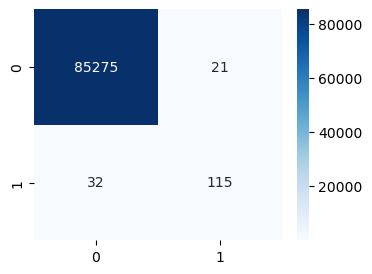

In [24]:
# Plotting confusion matrix for testing dataset

y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test) # Needed input for confusion matrix

from sklearn import datasets, svm
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred.round())
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")

8901/8901 [==============================] - 17s 2ms/step


<AxesSubplot:>

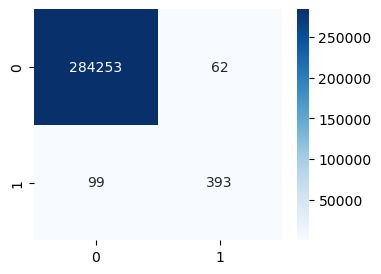

In [25]:
# Plotting confusion matrix for complete dataset

y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

cm = confusion_matrix(y_expected,y_pred.round())
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")

## Sampling

#### Undersampling Technique

In [26]:
# NOTE: There is a loss of valuable information

In [27]:
# Indicate the fradulent transactions
fraud_indices = np.array(data[data.Class == 1].index)

# Count the number of fradulent indices
number_fraud_records = len(fraud_indices)
print(number_fraud_records)

492


In [28]:
# Indicate non-fradulent transactions
non_fraud_indices = np.array(data[data.Class == 0].index)

# Count the number of non-fradulent indices
number_non_fraud_records = len(non_fraud_indices)
print(number_non_fraud_records)

284315


In [30]:
# Select as many non-fradulent transactions as fradulent transactions

random_non_fraud_indices = np.random.choice(non_fraud_indices,number_fraud_records,replace=False)
random_non_fraud_indices = np.array(random_non_fraud_indices)
print(len(random_non_fraud_indices))

492


In [31]:
under_sample_indices = np.concatenate([fraud_indices,random_non_fraud_indices])
print(len(under_sample_indices))

984


In [32]:
# For undersampling data, select the rows of those indices

under_sample_data = data.iloc[under_sample_indices,:]

In [33]:
X_undersample = under_sample_data.iloc[:,under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:,under_sample_data.columns == 'Class']

In [34]:
X_undersample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,NormalizedAmount
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,...,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,-0.353229
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,...,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,1.761758
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,...,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,0.606031
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,...,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,-0.117342
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,...,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,-0.349231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275396,-2.005780,0.629785,-2.173740,-3.322451,0.327831,-1.163432,0.525270,0.843663,-2.023552,-0.925732,...,-0.975347,0.125507,0.221672,-0.610637,0.299183,0.862326,0.854055,-0.663147,-0.227952,-0.150446
230922,0.231060,1.344995,-0.938624,1.332510,0.789046,-0.979169,1.071754,-0.049422,-2.009004,0.533289,...,-0.133523,0.168260,0.444326,-0.002922,0.052700,-0.514968,2.368487,-0.308019,-0.116539,-0.290339
40458,1.295421,-0.986446,0.781192,-0.582599,-1.426099,-0.039008,-1.177270,0.213880,-0.105414,0.676647,...,0.035585,0.298431,0.840802,-0.207029,0.022675,0.551375,0.002395,0.022727,0.006714,-0.213496
242569,-0.183054,0.810968,-0.693249,-0.525404,1.303596,-0.428458,0.847120,-0.054474,-0.153588,-0.725238,...,-0.142164,0.328344,0.937974,-0.351840,-1.188079,-0.442268,-0.119954,0.085296,0.239582,-0.281264


In [35]:
y_undersample

,Class
541,1
623,1
4920,1
6108,1
6329,1
...,...
275396,0
230922,0
40458,0
242569,0


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size=0.3)

In [37]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                480       
                                                                 
 dense_1 (Dense)             (None, 24)                408       
                                                                 
 dropout (Dropout)           (None, 24)                0         
                                                                 
 dense_2 (Dense)             (None, 20)                500       
                                                                 
 dense_3 (Dense)             (None, 24)                504       
                                                                 
 dense_4 (Dense)             (None, 1)                 25        
                                                                 
Total params: 1,917
Trainable params: 1,917
Non-trainabl

#### Training the Deep Neural Network for Undersampling data

In [39]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 3ms/step - loss: 0.4774 - accuracy: 0.9186
Epoch 2/5
46/46 [==============================] - 0s 3ms/step - loss: 0.2297 - accuracy: 0.9259
Epoch 3/5
46/46 [==============================] - 0s 3ms/step - loss: 0.1625 - accuracy: 0.9331
Epoch 4/5
46/46 [==============================] - 0s 3ms/step - loss: 0.1600 - accuracy: 0.9390
Epoch 5/5
46/46 [==============================] - 0s 3ms/step - loss: 0.1547 - accuracy: 0.9375


#### Confusion Matrix

10/10 [==============================] - 0s 2ms/step


<AxesSubplot:>

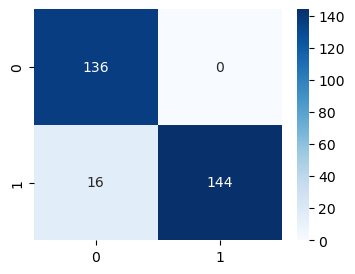

In [40]:
# Plotting confusion matrix for testing dataset

y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

cm = confusion_matrix(y_test,y_pred.round())
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")

8901/8901 [==============================] - 18s 2ms/step


<AxesSubplot:>

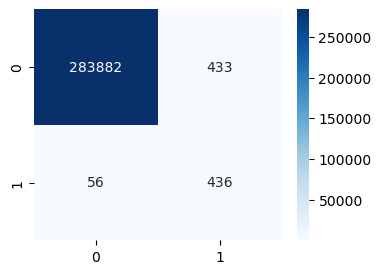

In [42]:
# Plotting confusion matrix for complete dataset

y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

cm = confusion_matrix(y_expected,y_pred.round())
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")

#### Oversampling Technique (SMOTE)

In [43]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [44]:
from imblearn.over_sampling import SMOTE

In [45]:
SMOTE = SMOTE(random_state=0)
X_resample,y_resample = SMOTE.fit_resample(X,y.values.ravel())

In [46]:
X_resample = pd.DataFrame(X_resample)
y_resample = pd.DataFrame(y_resample)

#### Splitting the oversampling dataset

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_resample,y_resample,test_size=0.3)

In [48]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

#### Training the Deep Neural Network for Oversampling dataset

In [49]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15,epochs=5)

Epoch 1/5
26537/26537 [==============================] - 76s 3ms/step - loss: 0.0271 - accuracy: 0.9911
Epoch 2/5
26537/26537 [==============================] - 72s 3ms/step - loss: 0.0127 - accuracy: 0.9967
Epoch 3/5
26537/26537 [==============================] - 76s 3ms/step - loss: 0.0109 - accuracy: 0.9972
Epoch 4/5
26537/26537 [==============================] - 75s 3ms/step - loss: 0.0100 - accuracy: 0.9975
Epoch 5/5
26537/26537 [==============================] - 75s 3ms/step - loss: 0.0089 - accuracy: 0.9979


#### Confusion Matrix

5331/5331 [==============================] - 10s 2ms/step


<AxesSubplot:>

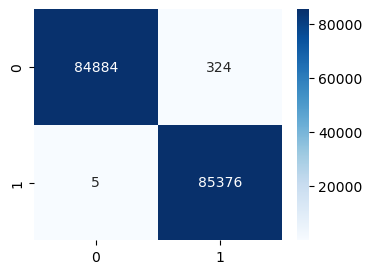

In [52]:
# Plotting confusion matrix for testing dataset

y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)

cm = confusion_matrix(y_test,y_pred.round())
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")

8901/8901 [==============================] - 18s 2ms/step


<AxesSubplot:>

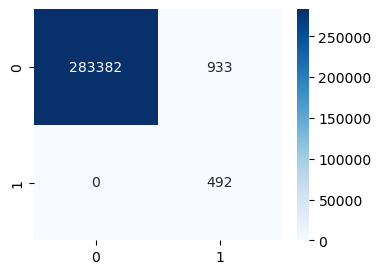

In [51]:
# Plotting confusion matrix for complete dataset

y_pred = model.predict(X)
y_expected = pd.DataFrame(y)

cm = confusion_matrix(y_expected,y_pred.round())
plt.figure(figsize = (4,3))
sns.heatmap(cm, annot=True, fmt=".0f", cmap="Blues")